# Problem Statement:

The customers of "Telecom Industry"  are free to select from multiple service providers and actively switch from one operator to another. The industry is highly competitive and faces around 15-25% of churning per year in average. Retaining existing customers is much more important than acquiring new customers as it costs around 5-10 times more to acquire one new customer. So, retaining high profitable customers is the first priority for telecom operators.

# Business Goal:

 - Analyse Customer level data for a leading telecom firm in the last month using the data from the first three months.
 - Build predictive models to identify customers at high risk of churn.
 - Identify the main indicators of churn.

# Data Understanding:

There are two types of telecom customers. Prepaid and postpaid. Prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.
This project is based on the Indian and Southeast Asian market.

**Postpaid customer**
- pay a monthly/annual bill after using the services
- when customers want to switch to another operator, they usually inform the existing operator to terminate the services,    and you directly know that this is an instance of churn.


**Prepaid customer**
- pay/recharge with a certain amount in advance and then use the services
- when customers want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g.travelling ).


### What is churn ?

**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’. The disadvantage of this definition is that there are customers who only receive calls/messages from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings or family members in urban areas.
**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. The disadvantage of his definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

**Here, we are dealing with the "Usage Based Churn" type.**

**High Value Churn:** In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Customer Behaviour:
Customers usually decide to switch to another competitor over a period of time (this is especially applicable to high-value customers) and not instantly.

There are three phases of customer lifecycle :

- The **‘good’** phase: In this phase, the customer is happy with the service and behaves as usual.

- The **‘action’** phase: The customer experience starts to sore in this phase. They receive attractive offers from other operators,  faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour.  At this stage, it is very essential to identify high-churn-risk customers, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- The **‘churn’** phase: In this phase, the customer is said to have already churned. We define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to us for prediction. Thus, after tagging churn as 1/0 based on this phase, we discard all the data corresponding to this phase.

**In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.**

# Step By Step Approach:

- Import essential libraries
- Data Understanding
- Filtering High Value Customers
- Data Cleaning
- Handling Missing value and Feature Engineering
- Derive new features
- Data Visualization
- Dimension Reduction using PCA
- RFE
- Model Building
- Model Evaluation
- Conclusion

In [1]:
# Importing essential packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
data = pd.read_csv("telecom_churn_data.csv")
# first five records of dataset
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

##### Data Understanding

In [3]:
# Copying the data to a new dataset and keeping the original data as it is
# We shall be using the copied dataset through out
# checking the shape of our dataset
tcm = data.copy()
tcm.shape

(99999, 226)

We have 99999 rows and 226 columns.

In [4]:
all_columns = tcm.columns.tolist()

In [5]:
recharge = [col for col in all_columns if 'rech' in col]
recharge

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [6]:
# checking the data for only 'recharge' features
tcm[recharge].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN


In [7]:
# Checking the basic info of our dataset
tcm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Checking statistical analysis of numerical features in dataset
tcm.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

**Observation**
- There are some features like loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou which are never used by customers. 
- There are a few features with high missing values. For example - total_rech_data_6, max_rech_data_6, date_of_last_rech_data_6 etc. We shall deal with the missing values in the forthcoming steps.
- There are a few instances where features have outliers. Some of them are - arpu_6, arpu_7, arpu_8 etc. We shall cap these as well in future.

##### Missing Values and treatment

In [9]:
# checking for missing values in 'recharge' features
round(((tcm[recharge].isnull().sum()/len(tcm.index))*100),2).sort_values(ascending=False)

total_rech_data_6           74.85
count_rech_3g_6             74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
av_rech_amt_data_6          74.85
count_rech_3g_7             74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
av_rech_amt_data_7          74.43
total_rech_data_7           74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
count_rech_2g_9             74.08
max_rech_data_9             74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
date_of_last_rech_data_8    73.66
av_rech_amt_data_8          73.66
total_rech_data_8           73.66
max_rech_data_8             73.66
count_rech_2g_8             73.66
count_rech_3g_8             73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
date_of_last_rech_6          1.61
total_rech_amt_7             0.00
total_rech_num

In [10]:
# checking missing values for all the features in the dataset
round(((tcm.isnull().sum()/len(tcm.index))*100),2).sort_values(ascending=False)

arpu_3g_6                   74.85
night_pck_user_6            74.85
total_rech_data_6           74.85
arpu_2g_6                   74.85
max_rech_data_6             74.85
fb_user_6                   74.85
av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
count_rech_3g_6             74.85
date_of_last_rech_data_7    74.43
total_rech_data_7           74.43
fb_user_7                   74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
count_rech_2g_7             74.43
av_rech_amt_data_7          74.43
arpu_2g_7                   74.43
count_rech_3g_7             74.43
arpu_3g_7                   74.43
total_rech_data_9           74.08
count_rech_3g_9             74.08
fb_user_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_9    74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
av_rech_amt_da

Let's first keep all the recharge related features together.

- There are some recharge related features with around 75% missing values.
- 'Recharge' is something that brings 'Revenue' to the company and is a very important feature
- We need to impute these missing values
- Date of recharge present, amount of recharge present, no of recharge = impute with mean/meadian

In [11]:
# checking the total_rech_num_X features
tcm[['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9']].head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9
0,4,3,2,6
1,4,9,11,5
2,5,4,2,7
3,10,11,18,14
4,5,6,3,4


In [12]:
# checking the date_of_last_rech_X features
tcm[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/26/2014,7/28/2014,8/9/2014,9/28/2014


In [13]:
# checking the total_rech_amt_6 features
tcm[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9']].head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9
0,362,252,252,0
1,74,384,283,121
2,168,315,116,358
3,230,310,601,410
4,196,350,287,200


In [14]:
# creating recharge columns' list to impute missing values with zeroes
impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
impute

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9']

In [15]:
# imputing missing values with 0
tcm[impute] = tcm[impute].apply(lambda x: x.fillna(0))

In [16]:
# checking for missing values % again
round(((tcm.isnull().sum()/len(tcm.index))*100),2).sort_values(ascending = False)

fb_user_6                   74.85
night_pck_user_6            74.85
count_rech_3g_6             74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
arpu_3g_7                   74.43
fb_user_7                   74.43
arpu_2g_7                   74.43
night_pck_user_7            74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
fb_user_9                   74.08
date_of_last_rech_data_9    74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
night_pck_user_9            74.08
arpu_3g_9                   74.08
arpu_2g_9                   74.08
night_pck_user_8            73.66
fb_user_8                   73.66
date_of_last_rech_data_8    73.66
count_rech_3g_8             73.66
arpu_2g_8                   73.66
arpu_3g_8                   73.66
count_rech_2g_8             73.66
isd_ic_mou_9                 7.75
loc_og_mou_9  

In [17]:
# checking the data types of features
tcm.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [18]:
# creating feature name list by types of features
# id type features
id_cols = ['mobile_number', 'circle_id']
# date tyep features
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

In [19]:
# category type features
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]
# numerical type features
num_cols = [column for column in tcm.columns if column not in id_cols + date_cols + cat_cols]

In [20]:
# dropping id type and date type features
tcm.drop(id_cols + date_cols, axis=1, inplace = True)

In [21]:
# checking the dimensions of the dataset
tcm.shape

(99999, 212)

In [22]:
# cheking missing value % again
round(((tcm.isnull().sum()/len(tcm.index))*100),2).sort_values(ascending=False)

count_rech_2g_6       74.85
night_pck_user_6      74.85
fb_user_6             74.85
arpu_2g_6             74.85
arpu_3g_6             74.85
count_rech_3g_6       74.85
count_rech_2g_7       74.43
count_rech_3g_7       74.43
night_pck_user_7      74.43
arpu_3g_7             74.43
arpu_2g_7             74.43
fb_user_7             74.43
night_pck_user_9      74.08
arpu_3g_9             74.08
count_rech_3g_9       74.08
fb_user_9             74.08
arpu_2g_9             74.08
count_rech_2g_9       74.08
arpu_3g_8             73.66
arpu_2g_8             73.66
night_pck_user_8      73.66
count_rech_2g_8       73.66
fb_user_8             73.66
count_rech_3g_8       73.66
std_og_mou_9           7.75
std_og_t2c_mou_9       7.75
loc_ic_t2t_mou_9       7.75
isd_og_mou_9           7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
std_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_ic_mou_9           7.75
std_ic_t2m_mou_9       7.75
std_ic_t2o_mou_9    

In [23]:
# replacing missing values with '-1' in categorical columns which will create a new category of -1
tcm[cat_cols] = tcm[cat_cols].apply(lambda x: x.fillna(-1))    

In [24]:
# checking missing value percentage for cat_cols
tcm[cat_cols].isnull().sum()*100/tcm.shape[0] # missing value on row level

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [25]:
total_cols = tcm.shape[1] # 212 features 
# setting a threshold value
thres = 0.7
# listing columns with missing val < 0.7 as true, columns with missing val > 0.7 as false
incl_cols = list(tcm.apply(lambda column: True if column.isnull().sum()/tcm.shape[0] < thres else False))

In [26]:
# marking the features as True/False as per the threshold value margin we have set
drop_missing = pd.DataFrame({'features':tcm.columns , 'include': incl_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [27]:
# checking dimensions before dropping features
tcm.shape

(99999, 212)

In [28]:
# dropping features 
tcm = tcm.loc[:, incl_cols]

In [29]:
#  checking dimensions after dropping features
tcm.shape

(99999, 196)

In [30]:
# listing all the features present now
tcm_cols= tcm.columns

In [31]:
# cheking the missing value % again
round(((tcm.isnull().sum()/len(tcm.index))*100),2).sort_values(ascending=False)

std_ic_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_og_t2f_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_og_mou_9          7.75
std_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
isd_og_mou_9          7.75
spl_og_mou_9          7.75
og_others_9           7.75
spl_ic_mou_9          7.75
loc_ic_t2t_mou_9      7.75
loc_ic_t2m_mou_9      7.75
loc_ic_t2f_mou_9      7.75
loc_ic_mou_9          7.75
std_ic_t2m_mou_9      7.75
std_ic_t2f_mou_9      7.75
std_ic_t2o_mou_9      7.75
std_ic_mou_9          7.75
loc_og_t2m_mou_9      7.75
std_og_t2c_mou_9      7.75
roam_og_mou_9         7.75
ic_others_9           7.75
onnet_mou_9           7.75
roam_ic_mou_9         7.75
isd_ic_mou_9          7.75
offnet_mou_9          7.75
spl_og_mou_8          5.38
std_og_t2c_mou_8      5.38
og_others_8           5.38
std_og_t2m_mou_8      5.38
loc_ic_mou_8          5.38
std_og_t2f_mou_8      5.38
loc_ic_t2f_mou_8      5.38
onnet_mou_8           5.38
l

In [32]:
# making a list of all the remaining features with missing values 
mean_imp = ['std_ic_t2t_mou_9', 'loc_og_t2t_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9'
,'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9','spl_ic_mou_9','loc_ic_t2t_mou_9' 
,'loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9' ,'std_ic_t2m_mou_9','std_ic_t2f_mou_9'
,'std_ic_t2o_mou_9','std_ic_mou_9','loc_og_t2m_mou_9','std_og_t2c_mou_9','roam_og_mou_9','ic_others_9','onnet_mou_9','roam_ic_mou_9'
,'isd_ic_mou_9','offnet_mou_9','spl_og_mou_8','std_og_t2c_mou_8' ,'og_others_8','std_og_t2m_mou_8','loc_ic_mou_8'
,'std_og_t2f_mou_8','loc_ic_t2f_mou_8','onnet_mou_8','loc_ic_t2m_mou_8','std_og_t2t_mou_8','std_og_mou_8','loc_ic_t2t_mou_8'  
,'isd_og_mou_8','offnet_mou_8','isd_ic_mou_8','roam_ic_mou_8','std_ic_t2t_mou_8','spl_ic_mou_8','loc_og_t2f_mou_8'
,'loc_og_t2t_mou_8','loc_og_mou_8','std_ic_t2m_mou_8','std_ic_mou_8','loc_og_t2m_mou_8','roam_og_mou_8','loc_og_t2c_mou_8'
,'std_ic_t2f_mou_8','ic_others_8','std_ic_t2o_mou_8','isd_ic_mou_6'  
,'loc_ic_t2t_mou_6','std_ic_mou_6','std_ic_t2o_mou_6','loc_ic_t2m_mou_6','std_ic_t2m_mou_6','loc_ic_t2f_mou_6'
,'onnet_mou_6','std_ic_t2f_mou_6','loc_ic_mou_6','ic_others_6','std_ic_t2t_mou_6','offnet_mou_6','loc_og_t2t_mou_6' 
,'spl_ic_mou_6','std_og_mou_6','og_others_6','std_og_t2f_mou_6','loc_og_mou_6','roam_og_mou_6'
,'roam_ic_mou_6','std_og_t2c_mou_6','std_og_t2t_mou_6','loc_og_t2c_mou_6','std_og_t2m_mou_6','isd_og_mou_6','spl_og_mou_6'
,'loc_og_t2f_mou_6','loc_og_t2m_mou_6','std_ic_t2o_mou_7','roam_og_mou_7','ic_others_7','loc_og_t2c_mou_7'
,'std_ic_t2f_mou_7','loc_og_t2f_mou_7','std_ic_mou_7','loc_og_t2m_mou_7','loc_og_mou_7','std_ic_t2m_mou_7','og_others_7'   
,'roam_ic_mou_7','std_og_t2t_mou_7','std_og_mou_7','offnet_mou_7','loc_og_t2t_mou_7','isd_ic_mou_7','spl_og_mou_7'  
,'isd_og_mou_7','loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','std_ic_t2t_mou_7','onnet_mou_7','std_og_t2c_mou_7','loc_ic_t2f_mou_7' 
,'std_og_t2f_mou_7','loc_ic_mou_7','std_og_t2m_mou_7','spl_ic_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
# checking the data types of all the features in the list above
tcm[mean_imp].dtypes

std_ic_t2t_mou_9    float64
loc_og_t2t_mou_9    float64
loc_og_t2f_mou_9    float64
loc_og_t2c_mou_9    float64
loc_og_mou_9        float64
std_og_t2t_mou_9    float64
std_og_t2m_mou_9    float64
std_og_t2f_mou_9    float64
std_og_mou_9        float64
isd_og_mou_9        float64
spl_og_mou_9        float64
og_others_9         float64
spl_ic_mou_9        float64
loc_ic_t2t_mou_9    float64
loc_ic_t2m_mou_9    float64
loc_ic_t2f_mou_9    float64
loc_ic_mou_9        float64
std_ic_t2m_mou_9    float64
std_ic_t2f_mou_9    float64
std_ic_t2o_mou_9    float64
std_ic_mou_9        float64
loc_og_t2m_mou_9    float64
std_og_t2c_mou_9    float64
roam_og_mou_9       float64
ic_others_9         float64
onnet_mou_9         float64
roam_ic_mou_9       float64
isd_ic_mou_9        float64
offnet_mou_9        float64
spl_og_mou_8        float64
std_og_t2c_mou_8    float64
og_others_8         float64
std_og_t2m_mou_8    float64
loc_ic_mou_8        float64
std_og_t2f_mou_8    float64
loc_ic_t2f_mou_8    

In [33]:
# Missing values are less than 8% now, imputing missing values on row level with the mean values of respective features
tcm[mean_imp] = tcm[mean_imp].fillna(tcm[mean_imp].mean())

In [34]:
# cheking the missing value % again
round(((tcm.isnull().sum()/len(tcm.index))*100),2).sort_values(ascending=False)

loc_og_t2o_mou        0.0
isd_ic_mou_6          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
isd_ic_mou_7          0.0
spl_ic_mou_9          0.0
std_og_t2o_mou        0.0
spl_ic_mou_8          0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_t2o_mou_6      0.0
std_ic_t2o_mou_7      0.0
std_ic_t2o_mou_8      0.0
std_ic_t2o_mou_9      0.0
std_ic_mou_6

- Now that we have zero missing values, let's move forward and sort the high value customers.

#### High Value Customer Filtering

**Deriving New Features**

In [35]:
# We have total number of recharge for talktime, and we have average amount of recharges
# So let's calculate total data recharge amount
# Calculating the total data recharge amount for months 6 and 7
# total number of recharges * average recharge amount
tcm['total_data_rech_6'] = tcm.total_rech_data_6 * tcm.av_rech_amt_data_6
tcm['total_data_rech_7'] = tcm.total_rech_data_7 * tcm.av_rech_amt_data_7


# all total recharge would be the addition of total data recharge and total talktime recharge
# calculating total recharge amount for months 6 and 7
# call recharge amount + data recharge amount
tcm['amt_data_6'] = tcm.total_rech_amt_6 + tcm.total_data_rech_6
tcm['amt_data_7'] = tcm.total_rech_amt_7 + tcm.total_data_rech_7


# calculating the average recharge done by customer in months 6 and 7
tcm['av_amt_data_6_7'] = (tcm.amt_data_6 + tcm.amt_data_7)/2

In [36]:
# Checking the 70th percentile recharge amount, then can filter customers having recharge amount equals or more than that
print(" 70th percentile recharge amount: {0}".format(tcm.av_amt_data_6_7.quantile(0.7)))

 70th percentile recharge amount: 478.0


In [37]:
# filtering only those customers who have recharged with amount more than or equal to 70th percentile amount
# these customers would be considered as high value customers
tcm_hv = tcm.loc[tcm.av_amt_data_6_7 >= tcm.av_amt_data_6_7.quantile(0.7), :]
tcm_hv = tcm_hv.reset_index(drop=True)
tcm_hv.shape

# tcm_hv = churn_filtered, tcm = churn

(30001, 201)

- Out of 99999 customers we have 30001 customers who are considered as high value customers and have recharged > or = to 478/-

In [38]:
# dropping the features we used to derive new useful features 
# they are not needed anymore
tcm_hv = tcm_hv.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
tcm_hv.shape

(30001, 196)

In [39]:
'''Now tagging the churned customers (churn=1, else 0) based on the fourth month as follows: 
Those who have not made any calls (incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
The attributes you need to use to tag churners are:

total_ic_mou_9
total_og_mou_9
vol_2g_mb_9
vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase 
(all attributes ending with ‘ _9’, etc).'''


'Now tagging the churned customers (churn=1, else 0) based on the fourth month as follows: \nThose who have not made any calls (incoming or outgoing) AND have not used mobile internet even once in the churn phase. \nThe attributes you need to use to tag churners are:\n\ntotal_ic_mou_9\ntotal_og_mou_9\nvol_2g_mb_9\nvol_3g_mb_9\n\nAfter tagging churners, remove all the attributes corresponding to the churn phase \n(all attributes ending with ‘ _9’, etc).'

In [40]:
# calculate total incoming and outgoing minutes of usage
tcm_hv['total_calls_mou_9'] = tcm_hv.total_ic_mou_9 + tcm_hv.total_og_mou_9
# calculate 2g and 3g data consumption
tcm_hv['total_internet_mb_9'] =  tcm_hv.vol_2g_mb_9 + tcm_hv.vol_3g_mb_9


**Deriving target feature 'churn'**

In [41]:
# createing churn feature: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churned, 1 - churned
tcm_hv['churn'] = tcm_hv.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
# dropping above two derived variables, they are not needed anymore
tcm_hv = tcm_hv.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [42]:
tcm_hv.shape

(30001, 197)

In [43]:
# change data type to category
tcm_hv.churn = tcm_hv.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(tcm_hv.churn.value_counts()*100/tcm_hv.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


- There is a visible class imbalance in our dataset, we shall deal with it later.

**Difference Between 'Action Phase' (month 8) and 'Good Phase'(month 6 and 7)**
Let's derive some variables. 
- We can derive some most important features using the difference between the 8th month and the avg previous month values.
- These features can help us understand some really crucial patterns and behaviour such as usage difference or recharge value difference. 

In [44]:
#Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

# avg revenue per user
tcm_hv['arpu_diff'] = tcm_hv.arpu_8 - ((tcm_hv.arpu_6 + tcm_hv.arpu_7)/2)
# online network monthly use
tcm_hv['onnet_mou_diff'] = tcm_hv.onnet_mou_8 - ((tcm_hv.onnet_mou_6 + tcm_hv.onnet_mou_7)/2)
# offline network monthly use
tcm_hv['offnet_mou_diff'] = tcm_hv.offnet_mou_8 - ((tcm_hv.offnet_mou_6 + tcm_hv.offnet_mou_7)/2)
# roaming incoming monthly use
tcm_hv['roam_ic_mou_diff'] = tcm_hv.roam_ic_mou_8 - ((tcm_hv.roam_ic_mou_6 + tcm_hv.roam_ic_mou_7)/2)
# roaming outgoing monthly use
tcm_hv['roam_og_mou_diff'] = tcm_hv.roam_og_mou_8 - ((tcm_hv.roam_og_mou_6 + tcm_hv.roam_og_mou_7)/2)
# local outgoing monthly use
tcm_hv['loc_og_mou_diff'] = tcm_hv.loc_og_mou_8 - ((tcm_hv.loc_og_mou_6 + tcm_hv.loc_og_mou_7)/2)
# std outgoing monthly use
tcm_hv['std_og_mou_diff'] = tcm_hv.std_og_mou_8 - ((tcm_hv.std_og_mou_6 + tcm_hv.std_og_mou_7)/2)
# international outgoing monthly use
tcm_hv['isd_og_mou_diff'] = tcm_hv.isd_og_mou_8 - ((tcm_hv.isd_og_mou_6 + tcm_hv.isd_og_mou_7)/2)
# special call outgoing monthly use
tcm_hv['spl_og_mou_diff'] = tcm_hv.spl_og_mou_8 - ((tcm_hv.spl_og_mou_6 + tcm_hv.spl_og_mou_7)/2)
# total outgoing monthly use
tcm_hv['total_og_mou_diff'] = tcm_hv.total_og_mou_8 - ((tcm_hv.total_og_mou_6 + tcm_hv.total_og_mou_7)/2)
# local incoming monthly use
tcm_hv['loc_ic_mou_diff'] = tcm_hv.loc_ic_mou_8 - ((tcm_hv.loc_ic_mou_6 + tcm_hv.loc_ic_mou_7)/2)
# std incoming monthly use
tcm_hv['std_ic_mou_diff'] = tcm_hv.std_ic_mou_8 - ((tcm_hv.std_ic_mou_6 + tcm_hv.std_ic_mou_7)/2)
# international incoming monthly use
tcm_hv['isd_ic_mou_diff'] = tcm_hv.isd_ic_mou_8 - ((tcm_hv.isd_ic_mou_6 + tcm_hv.isd_ic_mou_7)/2)
# special call incoming monthly use
tcm_hv['spl_ic_mou_diff'] = tcm_hv.spl_ic_mou_8 - ((tcm_hv.spl_ic_mou_6 + tcm_hv.spl_ic_mou_7)/2)
# total incoming monthly use
tcm_hv['total_ic_mou_diff'] = tcm_hv.total_ic_mou_8 - ((tcm_hv.total_ic_mou_6 + tcm_hv.total_ic_mou_7)/2)
# total recharge number
tcm_hv['total_rech_num_diff'] = tcm_hv.total_rech_num_8 - ((tcm_hv.total_rech_num_6 + tcm_hv.total_rech_num_7)/2)
# total recharge amount
tcm_hv['total_rech_amt_diff'] = tcm_hv.total_rech_amt_8 - ((tcm_hv.total_rech_amt_6 + tcm_hv.total_rech_amt_7)/2)
# maximum recharge amount
tcm_hv['max_rech_amt_diff'] = tcm_hv.max_rech_amt_8 - ((tcm_hv.max_rech_amt_6 + tcm_hv.max_rech_amt_7)/2)
# total data recharge
tcm_hv['total_rech_data_diff'] = tcm_hv.total_rech_data_8 - ((tcm_hv.total_rech_data_6 + tcm_hv.total_rech_data_7)/2)
# maximum data recharge
tcm_hv['max_rech_data_diff'] = tcm_hv.max_rech_data_8 - ((tcm_hv.max_rech_data_6 + tcm_hv.max_rech_data_7)/2)
# average data recharge amount
tcm_hv['av_rech_amt_data_diff'] = tcm_hv.av_rech_amt_data_8 - ((tcm_hv.av_rech_amt_data_6 + tcm_hv.av_rech_amt_data_7)/2)
# 2g internet volume in mb
tcm_hv['vol_2g_mb_diff'] = tcm_hv.vol_2g_mb_8 - ((tcm_hv.vol_2g_mb_6 + tcm_hv.vol_2g_mb_7)/2)
# 3g internet volume in mb
tcm_hv['vol_3g_mb_diff'] = tcm_hv.vol_3g_mb_8 - ((tcm_hv.vol_3g_mb_6 + tcm_hv.vol_3g_mb_7)/2)

In [45]:
# statistical description of numerical features in dataset
tcm_hv.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.0,

In [46]:
# dropping all features relating to 9th month
tcm_hv = tcm_hv.filter(regex='[^9]$', axis=1)
tcm_hv.shape

(30001, 173)

In [47]:
# listing all features name that end with 9
col_9_names = tcm.filter(regex='9$', axis=1).columns

# updating previously created lists (num_cols and cat_cols) with existing feature and their data types
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in tcm_hv.columns if col not in cat_cols]

##### Data Visualization

In [48]:
# setting up data types for features before starting with visualization
tcm_hv[num_cols] = tcm_hv[num_cols].apply(pd.to_numeric)
tcm_hv[cat_cols] = tcm_hv[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [49]:
# creating plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
# function for univariate analysis    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable: numeric variable or a categorical vairable allowed")
        
# function for bivariate analysis       
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

**Univariate Analysis**

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


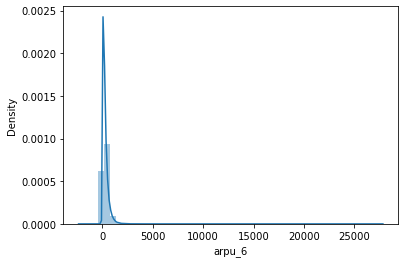

In [50]:
# for average recharge per user - month 6
univariate(tcm.arpu_6)

count    99999.000000
mean       133.670805
std        302.777225
min          0.000000
25%          7.290000
50%         35.810000
75%        133.670805
max       8157.780000
Name: onnet_mou_7, dtype: float64


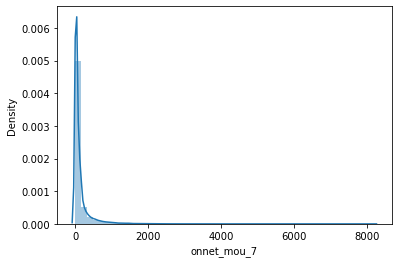

In [51]:
# for onnet_mou_7
univariate(tcm.onnet_mou_7)

count    99999.000000
mean        91.755128
std        152.269511
min          0.000000
25%         11.180000
50%         45.340000
75%        102.960000
max       4961.330000
Name: loc_og_t2m_mou_8, dtype: float64


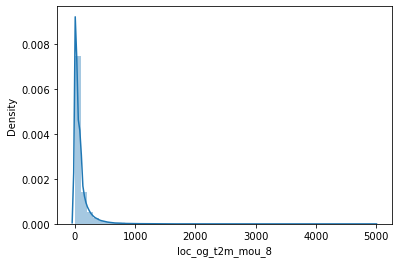

In [52]:
# for loc_og_t2m_mou_8
univariate(tcm.loc_og_t2m_mou_8)

count    99999.000000
mean       133.018098
std        300.528905
min          0.000000
25%          7.410000
50%         37.160000
75%        133.018098
max      10752.560000
Name: onnet_mou_8, dtype: float64


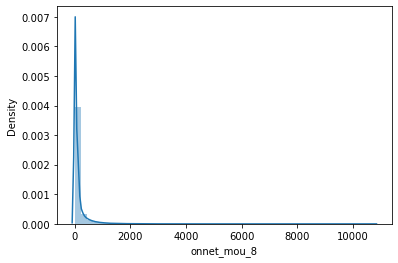

In [53]:
# for online network usage in month 8
univariate(tcm.onnet_mou_8)

count    99999.000000
mean       190.337222
std        306.777984
min          0.000000
25%         31.230000
50%        101.290000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


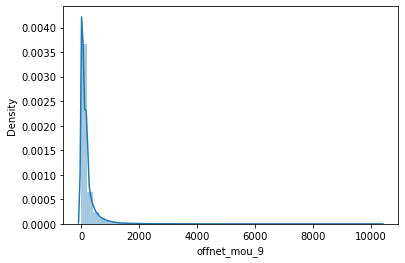

In [54]:
# for offline network usage in month 9
univariate(tcm.offnet_mou_9)

count    99999.000000
mean       141.670476
std        243.884505
min          0.000000
25%         18.880000
50%         68.630000
75%        157.970000
max       7674.780000
Name: loc_og_mou_7, dtype: float64


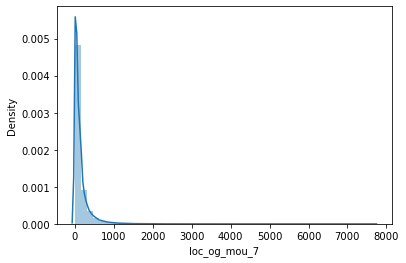

In [55]:
# for loc_og_mou_7
univariate(tcm.loc_og_mou_7) 

count    99999.000000
mean        68.170248
std        267.580450
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      12916.220000
Name: aug_vbc_3g, dtype: float64


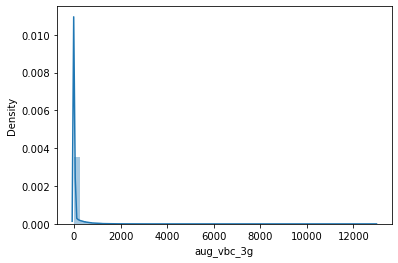

In [56]:
# for aug_vbc_3g
univariate(tcm.aug_vbc_3g)

**Observation**
- all the above features are inclined to left and highly skewed

**Bivariate Analysis**

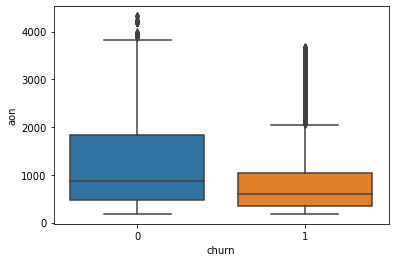

In [57]:
# churn vs age on network (since how many days customer has been using operator)
bivariate(tcm_hv.churn, tcm_hv.aon)

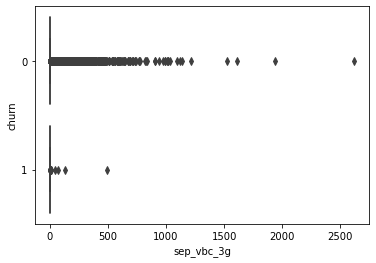

In [58]:
# churn vs 3g volume useage in month sept
bivariate(tcm_hv.sep_vbc_3g, tcm_hv.churn)

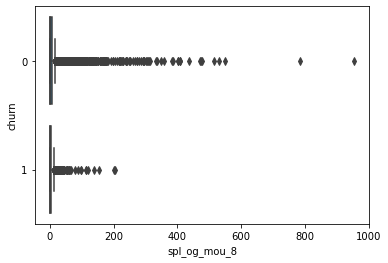

In [59]:
# churn vs special outgoing calls in month 8
bivariate(tcm_hv.spl_og_mou_8, tcm_hv.churn)

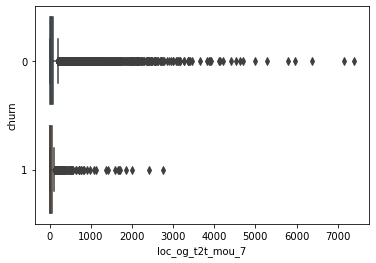

In [60]:
# churn vs loc_og_t2t_mou_7
bivariate(tcm_hv.loc_og_t2t_mou_7, tcm_hv.churn)

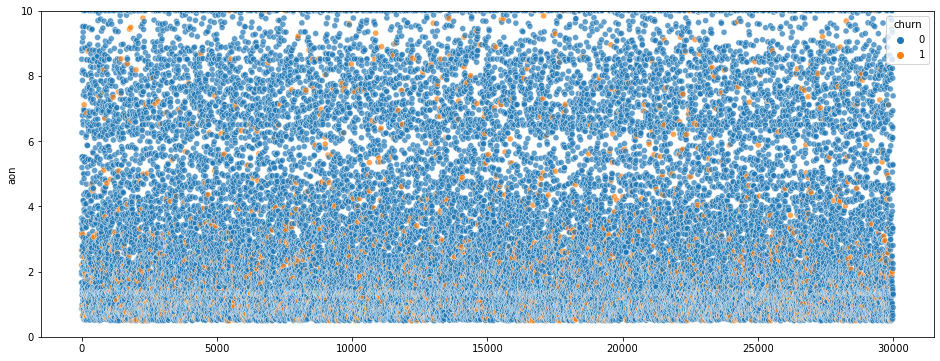

In [61]:
# Checking churn vs tenure using scatter plot

plt.figure(figsize=(16,6))
sns.scatterplot(y=tcm_hv['aon'] / 365, x=tcm_hv.index, hue=tcm_hv.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

**Observation**
- All of the features above have outliers implying us to cap them in the forth-coming steps.
- And, customers hvae churned the most within 2 yrs of subscription.

- Let's check some users' behaivour while using a certain 'feature'

In [62]:
# Computing a simple cross tabulation churn vs night_pck_user_8
pd.crosstab(tcm_hv.churn, tcm_hv.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [63]:
# Computing a simple cross tabulation churn vs sachet_3g_8
pd.crosstab(tcm_hv.churn, tcm_hv.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**Outlier Treatment**

In [64]:
# function to cap outliers
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [65]:
# example of capping
#sample_array = list(range(100))

# add outliers to the data
#sample_array[0] = -9999
#sample_array[99] = 9999

# cap outliers
#sample_array = np.array(sample_array)
#print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

In [66]:
# capping the outliers in the numeric features using above function
tcm_hv[num_cols] = tcm_hv[num_cols].apply(cap_outliers, axis=0)

In [67]:
# let's check the statistical distribution again
tcm_hv.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.

- We have successfully capped the outliers.

### Modeling

In [68]:
# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

**Data Preparation**

In [69]:
# change churn to numeric
tcm_hv['churn'] = pd.to_numeric(tcm_hv['churn'])

In [70]:
# divide data into train and test
X = tcm_hv.drop("churn", axis = 1)
y = tcm_hv.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [71]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 172)
(22500,)
(7501, 172)
(7501,)


**Grouping the categorical features**

In [72]:
train = pd.concat([X_train, y_train], axis=1)

# grouping the categorical variables using 'groupby'
print(train.groupby('night_pck_user_6').churn.mean())
print(train.groupby('night_pck_user_7').churn.mean())
print(train.groupby('night_pck_user_8').churn.mean())
print(train.groupby('fb_user_6').churn.mean())
print(train.groupby('fb_user_7').churn.mean())
print(train.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.099165
0.0     0.066797
1.0     0.087838
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.115746
0.0     0.055494
1.0     0.051282
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.141108
0.0     0.029023
1.0     0.016194
Name: churn, dtype: float64
fb_user_6
-1.0    0.099165
0.0     0.069460
1.0     0.067124
Name: churn, dtype: float64
fb_user_7
-1.0    0.115746
0.0     0.059305
1.0     0.055082
Name: churn, dtype: float64
fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churn, dtype: float64


In [73]:
# replacing categories with aggregated values in each categorical features
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [74]:
# confirming the datatypes of categorical features
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  22500 non-null  category
 1   night_pck_user_7  22500 non-null  category
 2   night_pck_user_8  22500 non-null  category
 3   fb_user_6         22500 non-null  category
 4   fb_user_7         22500 non-null  category
 5   fb_user_8         22500 non-null  category
dtypes: category(6)
memory usage: 308.4 KB


#### Making Predictions

**PCA**

In [75]:
# applying pca to train set
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [76]:
# fitting the model
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [77]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# checking the variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.42
1       20.82
2       26.57
3       31.42
4       35.45
5       39.17
6       41.92
7       44.51
8       46.83
9       48.97
10      51.00
11      52.93
12      54.73
13      56.46
14      58.07
15      59.54
16      60.91
17      62.26
18      63.59
19      64.90
20      66.10
21      67.27
22      68.39
23      69.47
24      70.51
25      71.48
26      72.44
27      73.36
28      74.27
29      75.16
30      76.03
31      76.85
32      77.66
33      78.46
34      79.23
35      79.97
36      80.69
37      81.38
38      82.04
39      82.68
40      83.30
41      83.86
42      84.41
43      84.96
44      85.49
45      86.01
46      86.50
47      86.97
48      87.44
49      87.89
50      88.31
51      88.70
52      89.09
53      89.45
54      89.81
55      90.15
56      90.49
57      90.82
58      91.15
59      91.47
60      91.78
61      92.07
62      92.36
63      92.64
64      92.92
65      93.19
66      93.46
67      93.71
68      93.95
69      94.19
70      94.41
71    

- 74 components explain more than 95% variance
- 44 components explain more than 90% variance

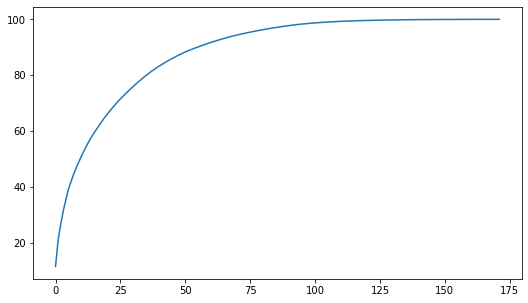

In [78]:
# plotting variance from pca components
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

**PCA and Logistic Regression**

In [79]:
# creating PCA pipeline with 60 features
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [80]:
# fiting the model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8064

**Model Evaluation**

In [81]:
# Churn prediction on test data
y_pred = pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Evaluating sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# Evaluating area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5470 1421]
 [  93  517]]
Sensitivity: 	0.85
Specificity: 	0.79
AUC:    	 0.89


Model performance on train data set is pretty decent.

**Hyper-parameter Tuning for PCA & Logistic Regression**

In [82]:
# checking the class imbalance ratio
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [83]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# creating pipeline with scaled features from pca using logistic regression
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compiling pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [84]:
# fiting the new model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [85]:
# evaluating the cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.521310,0.128424,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,1.766889,0.113638,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
2,1.977455,0.309195,0.069054,0.016354,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.880875,0.864869,0.876267,0.895334,0.869640,0.877397,0.010509,15
3,2.432335,0.337991,0.069136,0.011496,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.885498,0.868738,0.877088,0.896991,0.876652,0.880993,0.009597,7
4,1.579620,0.110461,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,1.941987,0.157370,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,2.047417,0.015482,0.085138,0.020134,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.881968,0.865362,0.875670,0.895732,0.870208,0.877788,0.010543,10
7,2.655681,0.106618,0.078611,0.008377,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.884972,0.869833,0.876905,0.895773,0.876940,0.880885,0.008853,8
8,1.552066,0.039098,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,2.002983,0.070171,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [86]:
# getting the best hyperparameters
print("Best AUC evaluated: ", model.best_score_)
print("Best hyperparameters evaluated: ", model.best_params_)

Best AUC evaluated:  0.8811696114902101
Best hyperparameters evaluated:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [87]:
# churn prediction on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking auc score
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5768 1123]
 [ 104  506]]
Sensitivity: 	0.83
Specificity: 	0.84
AUC:    	 0.9


**Random Forest**

In [88]:
# random forest -  class weight handles class imbalance by adjusting the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# creating 5 folds here too
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [89]:
# fiting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [90]:
# getting the best hyperparameters
print("Best AUC evaluated: ", model.best_score_)
print("Best hyperparameters evaluated: ", model.best_params_)

Best AUC evaluated:  0.9268896148018797
Best hyperparameters evaluated:  {'criterion': 'entropy', 'max_features': 0.4}


In [91]:
# churn prediction on test data
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# evaluating area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6773  118]
 [ 301  309]]
Sensitivity: 	0.51
Specificity: 	0.98
AUC:    	 0.94


- **Sensitivity score is lower than the sensitivity score we obtained from Logistic regression model with PCA**. We can say that the Logistic Regression Model with PCA is a better model.


**Best Feature Selection**

In [92]:
# running a random forest model on X_train
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of features to consider while splitting each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)


13


In [93]:
# fiting model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.1s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [94]:
# checking OOB score
rf_model.oob_score_

0.9430666666666667

In [95]:
# Churn prediction on test data
y_pred = rf_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# evaluating area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6799   92]
 [ 326  284]]
Sensitivity: 	0.47
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


- Sensitivity score is poor here.

**Feature Importance**

In [96]:
# predictors
features = tcm_hv.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,6.526987
1,roam_og_mou_8,5.027694
2,total_og_mou_8,3.752686
3,roam_ic_mou_8,3.320865
4,arpu_8,2.996393
5,total_rech_amt_diff,2.813091
6,arpu_diff,2.780812
7,last_day_rch_amt_8,2.736845
8,max_rech_amt_8,2.709272
9,loc_ic_t2m_mou_8,2.598117


**Top 30 Features**

In [97]:
# extract top 'n' features
top_30 = 30
top_features = feature_importance.variables[0:top_30]

<AxesSubplot:>

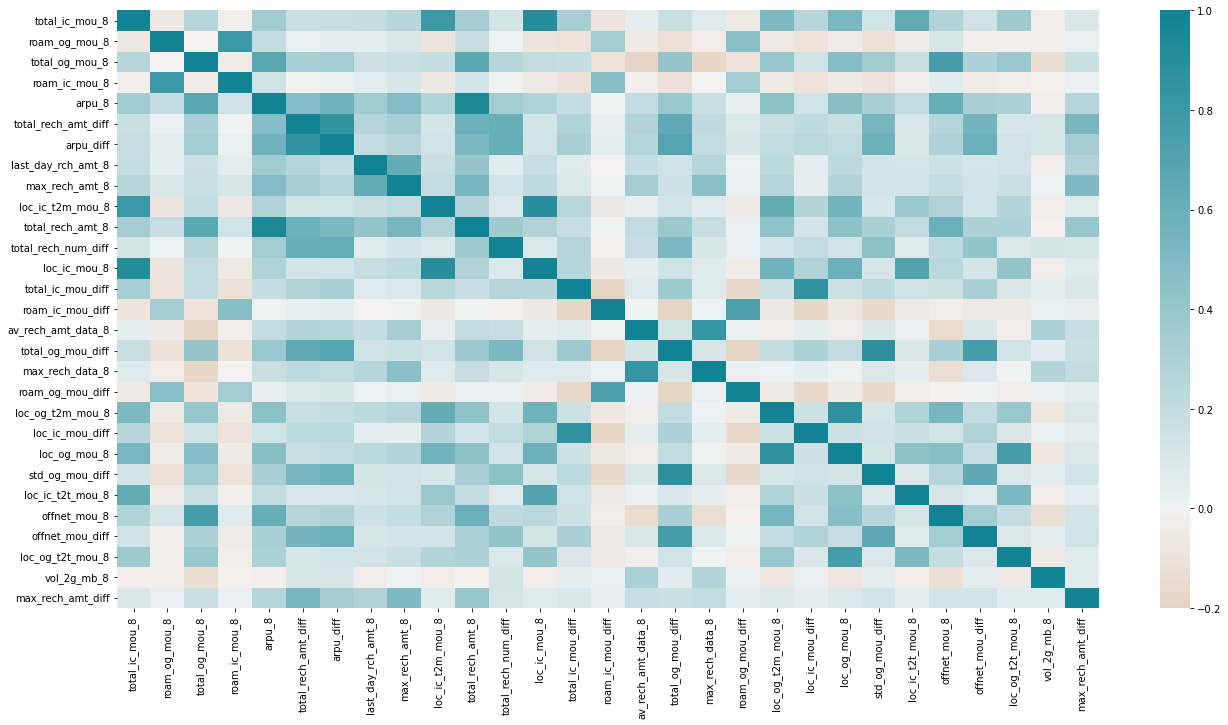

In [98]:
# plotting correlation heatmap
import seaborn as sns
plt.rcParams["figure.figsize"] =(22,11)
mycmap = sns.diverging_palette(755, 570, s=97, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [99]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [100]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compiling pipeline
logistic = Pipeline(steps)

# hyperparameter 
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [101]:
# fitting model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [102]:
# getting best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8825870171450745
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [103]:
# churn prediction on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5780 1111]
 [ 125  485]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.89


**Intercept and Co-oefficients**

In [104]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.597897,-0.865688,-0.699139,-2.406123,0.326068,-0.021768,0.238346,0.141701,-0.791442,1.732919


## Recommendations:

- Our client, the Telecom company should pay special attention to those customers who are using outgoing roaming services and come up with special offers for the roaming service user group only to stop them from churning.
- Also, it is advised to recognise the customers with high 'avg recharge' amount and offer some packages to them as well (with extra talktime or extra 1GB data for 2g/3g network etc.) to make them feel rewarded everytime they recharge.
- In addition to that, if the telecom company could provide some offers on std incoming and outgoing calls that would help a lot of customers from churning.
- On an important note, it is always appreciated to be in touch with the high value customers and perform QnA sessions, take feedbacks from the customers. 
- In order to sort the high value customers we can come up with a flag showing if a particular customer belongs to 'high_value' group or not.
- It is also a good practice to keep adding new offers according to cusomers' need and demand and improving existing services.